import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
# Załadowanie danych

In [3]:
df = pd.read_csv('../train_set.csv')

<IPython.core.display.Javascript object>

In [14]:
df = df.rename(columns={"Unnamed: 0": "index"}).set_index("index")

### Usunięcie kolumn z numerami id (są dla nas zbędne)

In [19]:
df.drop(['track_id', 'track_album_id', 'playlist_id'], axis = 1, inplace=True)

# Pierwsze spojrzenie na zbiór danych

In [20]:
df.head()

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
20378,Baila Baila Baila,Ozuna,65,Baila Baila Baila,2019-01-05,Latest Latin American Hits 2020,latin,latin hip hop,0.816,0.754,11,-2.750,0,0.1110,0.03610,0.000000,0.2170,0.533,99.966,158400
3549,Last Dance,Covenant,0,Last Dance,2013-06-07,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,0.611,0.988,10,-3.971,1,0.1020,0.00254,0.784000,0.2220,0.269,136.015,378120
28314,Activate,Sandro Silva,31,Activate,2019-12-04,Big Room EDM,edm,big room,0.641,0.874,1,-4.991,1,0.0746,0.13600,0.000002,0.1990,0.140,127.922,177187
149,Let Me Love You,DJ Snake,81,Encore,2016-08-05,Dance Pop,pop,dance pop,0.649,0.716,8,-5.371,1,0.0349,0.08630,0.000026,0.1350,0.163,99.988,205947
1931,Stacy's Mom,Fountains Of Wayne,73,Welcome Interstate Managers,2003-01-01,Dr. Q's Prescription Playlist💊,pop,post-teen pop,0.774,0.750,11,-4.927,0,0.0413,0.00210,0.000018,0.0808,0.925,118.015,197987


In [21]:
df.tail()

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
20376,Baby Girl (feat. Lalo Ebratt),Mario Bautista,75,Baby Girl (feat. Lalo Ebratt),2018-08-17,Latest Latin American Hits 2020,latin,latin hip hop,0.804,0.705,1,-5.272,1,0.1990,0.0275,0.000138,0.202,0.450,103.009,218470
15792,Kano Kalokeria,Kim,21,Kano Kalokeria,2016-05-30,Rock Hubspot,rock,hard rock,0.711,0.747,7,-5.115,0,0.0400,0.2720,0.001350,0.105,0.620,96.979,191862
13877,Trampled Rose,Tom Waits,34,Real Gone (Remastered),2004-10-05,Permanent Wave,rock,permanent wave,0.379,0.396,10,-9.274,0,0.0276,0.8430,0.000897,0.121,0.450,130.709,237453
2084,Turn Up the Music,Adam Hicks,56,Lemonade Mouth,2011-01-01,post teen pop,pop,post-teen pop,0.531,0.827,7,-3.700,1,0.0810,0.0957,0.000002,0.074,0.801,183.977,176600
30895,Collide (feat. Collin McLoughlin) - Radio Edit,Laidback Luke,27,Collide,2014-01-27,Happy EDM,edm,pop edm,0.443,0.948,4,-3.290,1,0.1080,0.0124,0.000004,0.131,0.341,127.928,200435


In [23]:
df.shape

(26266, 20)

In [24]:
df.columns

Index(['track_name', 'track_artist', 'track_popularity', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26266 entries, 20378 to 30895
Data columns (total 20 columns):
track_name                  26262 non-null object
track_artist                26262 non-null object
track_popularity            26266 non-null int64
track_album_name            26262 non-null object
track_album_release_date    26266 non-null object
playlist_name               26266 non-null object
playlist_genre              26266 non-null object
playlist_subgenre           26266 non-null object
danceability                26266 non-null float64
energy                      26266 non-null float64
key                         26266 non-null int64
loudness                    26266 non-null float64
mode                        26266 non-null int64
speechiness                 26266 non-null float64
acousticness                26266 non-null float64
instrumentalness            26266 non-null float64
liveness                    26266 non-null float64
valence                     26266

Widzimy, że w zmiennych, które będą nas interesowały nie ma zadnych braków danych. Jedyne braki (4), są w kolumnach track_name, track_srtist i track_album name, a te kolumny nie będą nas interesowały w modelu. Dlatego też zostawiam obserwacje z brakami danych.

In [28]:
df[df['track_name'].isna()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
9283,NaN,NaN,0,NaN,2017-12-01,GANGSTA Rap,rap,gangster rap,0.465,0.820,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19811,NaN,NaN,0,NaN,2012-01-05,latin hip hop,latin,latin hip hop,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
8151,NaN,NaN,0,NaN,2012-01-05,HIP&HOP,rap,southern hip hop,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
19568,NaN,NaN,0,NaN,2012-01-05,Reggaeton viejito🔥,latin,reggaeton,0.675,0.919,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773


In [29]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,26266.000000,26266.000000,26266.000000,26266.000000,26266.000000,26266.000000,26266.000000,26266.000000,26266.000000,26266.000000,26266.00000,26266.000000,26266.000000
mean,42.391990,0.655124,0.698052,5.394997,-6.725419,0.564951,0.106836,0.175483,0.085842,0.189314,0.50995,120.852165,225836.410264
std,25.023533,0.144813,0.181165,3.612324,2.993145,0.495773,0.100695,0.220276,0.225875,0.153064,0.23298,26.935612,59897.057833
min,0.000000,0.000000,0.011800,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4000.000000
25%,24.000000,0.563000,0.580000,2.000000,-8.191000,0.000000,0.041000,0.015000,0.000000,0.092600,0.33000,99.953250,187804.750000
50%,45.000000,0.672000,0.721000,6.000000,-6.164000,1.000000,0.062500,0.079800,0.000017,0.127000,0.51100,121.984000,216050.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.644000,1.000000,0.132000,0.255000,0.005020,0.247000,0.69200,133.896750,253733.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.869000,0.994000,0.994000,0.996000,0.99100,220.252000,517810.000000


## Skrajne przypadki dla niektórych zmiennych

### Track popularity

In [33]:
df[df['track_popularity'] == df['track_popularity'].max()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
20091,Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,latin,latin hip hop,0.824,0.588,6,-6.4,0,0.0924,0.692,0.000104,0.149,0.513,98.027,209438
1551,Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",pop,post-teen pop,0.824,0.588,6,-6.4,0,0.0924,0.692,0.000104,0.149,0.513,98.027,209438


Widzimy, że ta sama piosenka może być w zbiorze danych więcej niż raz. W części budowania modelu zastanowimy się, co dalej z tym robić.

In [34]:
df[df['track_popularity'] == df['track_popularity'].min()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
3549,Last Dance,Covenant,0,Last Dance,2013-06-07,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,0.611,0.988,10,-3.971,1,0.1020,0.00254,0.784000,0.2220,0.269,136.015,378120
19896,Girl You Hear me Crying,N.V.,0,Some Kind Of Love,1994,Latin Hip Hop/Freestyle,latin,latin hip hop,0.640,0.816,2,-10.808,1,0.0396,0.01050,0.000335,0.2310,0.412,122.837,258093
9756,Aquí en la Calle,Berbal La 4 Verde,0,"La 4 Verde & Rolando Hits: Éxitos, Vol.1, 2 y 3",2016-10-18,Mexican Gangsta Rap,rap,gangster rap,0.700,0.685,7,-7.177,1,0.0588,0.20300,0.000000,0.1820,0.484,80.000,158694
17933,Aguacero,Altafulla,0,Aguacero,2014-03-11,MIX LATIN POP°,latin,latin pop,0.644,0.755,4,-6.241,1,0.2630,0.09180,0.000000,0.3540,0.809,191.948,210730
8240,Sanctified,Rick Ross,0,Mastermind (Deluxe),2014-01-01,Contemporary Hip Hop,rap,southern hip hop,0.739,0.523,9,-6.293,1,0.0692,0.08150,0.000000,0.3820,0.228,125.990,289627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11620,Sueño Espacial/Año 2000 (Look At That Light) -...,Miguel Rios,0,Rock & Rios (Remastered),2005-01-01,Rock and Rios,rock,album rock,0.412,0.839,2,-9.793,1,0.0526,0.03070,0.000000,0.9450,0.407,128.069,427080
24112,Remember The Time,Michael Jackson,0,Dangerous,1991-11-13,New Jack Swing,r&b,new jack swing,0.831,0.921,5,-2.383,0,0.0581,0.15300,0.002130,0.3050,0.794,108.002,239227
13057,What's Your Name,Lynyrd Skynyrd,0,The Complete Collection,2008-01-01,Southern Rock/Classic Rock,rock,classic rock,0.666,0.593,2,-7.612,1,0.0284,0.67700,0.000015,0.1040,0.960,135.196,211867


### Danceability

In [36]:
df[df['danceability'] == df['danceability'].max()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
31627,If Only I Could (feat. Steve Lucas) - Liem Remix,Fusion Groove Orchestra,41,If Only I Could (feat. Steve Lucas),2016-04-01,House/Electro/Progressive/Disco/Lofi/Synthwave,edm,progressive electro house,0.983,0.936,9,-8.541,0,0.325,0.0943,0.719,0.0902,0.878,126.0,426945


In [37]:
df[df['danceability'] == df['danceability'].min()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
11363,"Hi, How're You Doin'?",DREAMS COME TRUE,0,Dreams Come True,1989-03-21,City Pop 1985 シティーポップ,rock,album rock,0.0,0.315,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


### Energy

In [38]:
df[df['energy'] == df['energy'].max()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
17004,Rain Forest and Tropical Beach Sound,Nature Sounds Nature Music,52,"Nature Sounds - Nature Music for Sleep, Yoga a...",2011-02-16,Tropical Nights,latin,tropical,0.160,1.0,5,-16.449,0,0.0458,0.854,0.974,0.963,0.00001,130.674,240000
17009,Chill Waves & Wind in Leaves,Pinetree Way,57,Waves,2019-10-03,Tropical Nights,latin,tropical,0.141,1.0,10,-14.729,0,0.1170,0.594,0.994,0.571,0.00001,102.045,241375


In [39]:
df[df['energy'] == df['energy'].min()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
22119,You Might Find Me,Jacob Banks,47,Creed II (Score & Music from the Original Moti...,2018-11-16,Urban contemporary,r&b,urban contemporary,0.393,0.0118,10,-22.988,0,0.05,0.94,0.0121,0.106,0.0596,108.236,147387


### Loudness

In [41]:
df[df['loudness'] == df['loudness'].max()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
12197,Raw Power - Iggy Pop Mix,The Stooges,36,Raw Power,1973-02-07,Nikki Sixx's Top Pixx,rock,album rock,0.345,0.998,8,1.275,1,0.229,0.0756,0.000018,0.108,0.28,154.85,256067


In [42]:
df[df['loudness'] == df['loudness'].min()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
17010,Peaceful Forest,The Sleep Specialist,51,Jungle And Forest Sounds,2017-01-09,Tropical Nights,latin,tropical,0.211,0.425,7,-46.448,0,0.0542,0.88,0.613,0.184,0.0122,116.884,181204


### Speechiness

In [43]:
df[df['speechiness'] == df['speechiness'].max()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
25738,Warm Water - Snakehips Remix,BANKS,57,Warm Water (Snakehips Remix),2013-08-13,Groovy // Funky // Neo-Soul,r&b,neo soul,0.511,0.678,4,-6.858,0,0.869,0.241,0.0,0.0948,0.405,212.137,253585


In [44]:
df[df['speechiness'] == df['speechiness'].min()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
11363,"Hi, How're You Doin'?",DREAMS COME TRUE,0,Dreams Come True,1989-03-21,City Pop 1985 シティーポップ,rock,album rock,0.0,0.315,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


### Acousticness

In [45]:
df[df['acousticness'] == df['acousticness'].max()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
8331,I'm Going to Live My Life,DJ Screw & The Screwed Up Click,2,Fallen Soldiers,2008-02-12,3rd Coast Classics,rap,southern hip hop,0.399,0.841,1,-10.442,1,0.699,0.994,0.901,0.448,0.773,151.021,46000


In [46]:
df[df['acousticness'] == df['acousticness'].min()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
11363,"Hi, How're You Doin'?",DREAMS COME TRUE,0,Dreams Come True,1989-03-21,City Pop 1985 シティーポップ,rock,album rock,0.0,0.315,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


Ta piosenka pojawia się drugi raz w zestawieniu skrajnych obserwacji. Za każdym razem ma najniższe wyniki. Zarówno w kategorii taneczności jak i akustyczności. Analizując jej pozostałe zmienne można zauważyć, że przyjmuje ona zera dla zmiennych takich jak instrumentalness, liveness, valence i tempo. Trzeba będzie przeanalizować, czy nie jest to błąd (pewnie trzeba bedzie posłuchać tej piosenki).

### Instrumentalness

In [47]:
df[df['instrumentalness'] == df['instrumentalness'].max()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
17009,Chill Waves & Wind in Leaves,Pinetree Way,57,Waves,2019-10-03,Tropical Nights,latin,tropical,0.141,1.0,10,-14.729,0,0.117,0.594,0.994,0.571,0.00001,102.045,241375


Ta piosenka jest zarówno najbardziej instrumentalna jak i najbardziej energetyczna.

In [48]:
df[df['instrumentalness'] == df['instrumentalness'].min()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
20378,Baila Baila Baila,Ozuna,65,Baila Baila Baila,2019-01-05,Latest Latin American Hits 2020,latin,latin hip hop,0.816,0.754,11,-2.750,0,0.1110,0.0361,0.0,0.2170,0.533,99.966,158400
5541,6 Kiss,Trippie Redd,83,A Love Letter To You 4,2019-11-22,RapCaviar,rap,hip hop,0.687,0.449,2,-10.061,1,0.1540,0.1090,0.0,0.2820,0.229,142.048,199437
19225,Bella y Sensual,Romeo Santos,73,Golden,2017-07-21,Tusa - Karol G | China - Anuel AA | Estrenos R...,latin,reggaeton,0.635,0.713,11,-6.909,1,0.0937,0.2280,0.0,0.0506,0.749,179.864,204701
6366,Monte Carlo,Jimilian,59,Monte Carlo,2019-10-11,DK rap,rap,hip hop,0.790,0.799,6,-5.275,1,0.1500,0.1230,0.0,0.0575,0.794,100.023,146400
20862,Design,Kevcody,51,Design,2019-04-19,🔥🦁 GOOD VIBES ONLY 🦁🔥 // BROEDERLIEFDE || FREN...,latin,latin hip hop,0.895,0.430,3,-6.400,0,0.1430,0.1260,0.0,0.0701,0.793,107.044,162034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20294,Atrévete,Nicky Jam,58,Atrévete,2019-08-02,Urbano: Latino Vibes,latin,latin hip hop,0.552,0.675,11,-3.824,1,0.2970,0.3110,0.0,0.1190,0.586,183.785,198320
20981,Lo Peor de Mi,Onell Diaz,40,Lo Peor de Mi,2018-05-08,LATIN FLOW MIX - Música Cristiana🎵,latin,latin hip hop,0.626,0.718,6,-5.904,1,0.0536,0.6000,0.0,0.2380,0.639,109.369,280451
8829,How Come,D12,1,D-12 World,2004-01-01,Gangsta Rap/90's Hip-Hop,rap,gangster rap,0.750,0.851,9,-2.197,1,0.2020,0.2560,0.0,0.2150,0.540,90.001,249533


Możemy zauważyć, że najwięcej nieintsrumentalnych kawałków, to rapsy :)

### Liveness

In [49]:
df[df['liveness'] == df['liveness'].max()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
11296,Knockin' On Heaven's Door - Live In London / 1992,Guns N' Roses,50,Live Era '87-'93,1999-01-01,This Is Guns N' Roses,rock,album rock,0.271,0.891,6,-6.011,1,0.0824,0.00188,0.0157,0.996,0.365,147.509,447160


Nic dziwnego, że największą wartość "na żywo" ma kawałek z dopiskiem "live in London" :)

In [50]:
df[df['liveness'] == df['liveness'].min()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
11363,"Hi, How're You Doin'?",DREAMS COME TRUE,0,Dreams Come True,1989-03-21,City Pop 1985 シティーポップ,rock,album rock,0.0,0.315,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


### Valence

In [51]:
df[df['valence'] == df['valence'].max()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
13531,Low Rider,War,36,The Very Best Of War,2003-01-01,70's Classic Rock,rock,classic rock,0.815,0.676,0,-9.68,1,0.047,0.0825,0.662,0.0508,0.991,139.764,191333


In [52]:
df[df['valence'] == df['valence'].min()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
11363,"Hi, How're You Doin'?",DREAMS COME TRUE,0,Dreams Come True,1989-03-21,City Pop 1985 シティーポップ,rock,album rock,0.0,0.315,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


### Tempo

In [53]:
df[df['tempo'] == df['tempo'].max()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
18406,It's Only Time,Cabela and Schmitt,37,Just Another Face in the Cloud,2017-04-28,INDIE POP! TUNES,latin,latin pop,0.397,0.575,5,-8.509,1,0.0407,0.0222,0.00007,0.197,0.247,220.252,271789


In [54]:
df[df['tempo'] == df['tempo'].min()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
11363,"Hi, How're You Doin'?",DREAMS COME TRUE,0,Dreams Come True,1989-03-21,City Pop 1985 シティーポップ,rock,album rock,0.0,0.315,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


### Duration

In [55]:
df[df['duration_ms'] == df['duration_ms'].max()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
21327,47 - Remix,Anuel AA,64,47 (Remix),2017-03-31,Los Cangri,latin,latin hip hop,0.711,0.699,6,-4.891,1,0.193,0.248,0.0,0.254,0.376,146.016,517810


In [57]:
517810/100/60

86.30166666666668

ten kawałek trwa 86 minut!

In [59]:
df[df['duration_ms'] == df['duration_ms'].min()]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
index,,,,,,,,,,,,,,,,,,,,
11363,"Hi, How're You Doin'?",DREAMS COME TRUE,0,Dreams Come True,1989-03-21,City Pop 1985 シティーポップ,rock,album rock,0.0,0.315,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


Nasz stary znajomy trwa tylko 4 sekundy.

## Gatunki muzyczne

In [63]:
len(df['playlist_genre'].unique())

6

Będziemy przewidywać 6 kategorii. Oto one:

In [64]:
df['playlist_genre'].unique()

array(['latin', 'pop', 'edm', 'rap', 'r&b', 'rock'], dtype=object)

In [72]:
df['playlist_genre'].value_counts()

edm      4848
rap      4616
pop      4400
r&b      4306
latin    4165
rock     3931
Name: playlist_genre, dtype: int64

In [74]:
#matplotlib inline

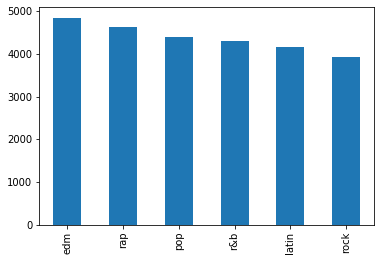

In [76]:
df['playlist_genre'].value_counts().plot.bar()

### Podgatunki

In [71]:
df.groupby('playlist_genre')['playlist_subgenre'].value_counts()

playlist_genre  playlist_subgenre        
edm             progressive electro house    1456
                electro house                1212
                pop edm                      1207
                big room                      973
latin           latin hip hop                1355
                tropical                     1040
                latin pop                    1022
                reggaeton                     748
pop             indie poptimism              1355
                electropop                   1125
                dance pop                    1025
                post-teen pop                 895
r&b             neo soul                     1299
                urban contemporary           1094
                hip pop                      1012
                new jack swing                901
rap             southern hip hop             1339
                gangster rap                 1171
                hip hop                      1071
        

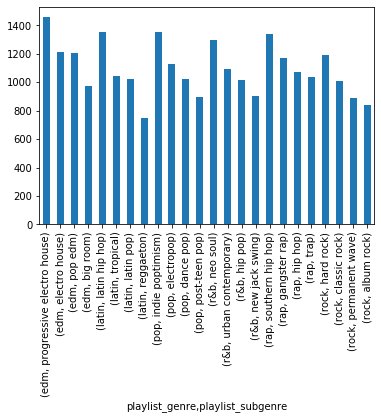

In [77]:
df.groupby('playlist_genre')['playlist_subgenre'].value_counts().plot.bar()

## Najpopularniejsi artyści

In [80]:
df['track_artist'].value_counts().head(10)

Martin Garrix                121
Queen                        104
The Chainsmokers             103
David Guetta                  87
Don Omar                      84
Hardwell                      76
Dimitri Vegas & Like Mike     75
Drake                         75
Calvin Harris                 72
Kygo                          68
Name: track_artist, dtype: int64

In [93]:
s = df.groupby('playlist_genre')['track_artist'].value_counts()
s.groupby(level=[0]).nlargest(3)

playlist_genre  playlist_genre  track_artist             
edm             edm             Martin Garrix                 95
                                Hardwell                      68
                                Dimitri Vegas & Like Mike     63
latin           latin           Don Omar                      82
                                Wisin & Yandel                50
                                J Balvin                      46
pop             pop             The Chainsmokers              39
                                Calvin Harris                 36
                                Javiera Mena                  35
r&b             r&b             The Weeknd                    33
                                Frank Ocean                   28
                                Bobby Brown                   27
rap             rap             Logic                         50
                                2Pac                          45
                                

## Histogramy

In [78]:
df.columns

Index(['track_name', 'track_artist', 'track_popularity', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Rozkład zmiennej track_popularity')

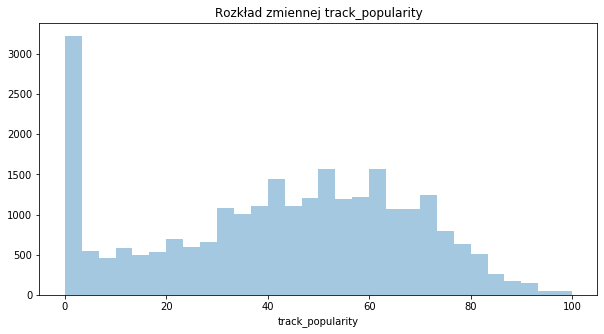

In [108]:
plt.figure(figsize = (10,5))
sns.distplot(df['track_popularity'], kde=False, bins = 30).set_title('Rozkład zmiennej track_popularity')

Widać bardzo dużo obserwacji z popularnością w okolizach zera. Gdybyśmy chcieli tworzyć model w oparciu o tę zmienną lub chcieli przewidywać popularność piosenek, to musielibyśmy się temu przyjrzeć.